In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:

iris = datasets.load_iris()  # load iris dataset
x = iris.data
y = iris.target
d = [{"sepal_length":row[0], 
      "sepal_width":row[1], 
      "petal_length":row[2], 
      "petal_width":row[3]} for row in x]
df = pd.DataFrame(d) # construct dataframe
df["types"] = y # assign types
df = df.sample(frac=1.0) # random shuffle rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,types
100,6.3,3.3,6.0,2.5,2
12,4.8,3.0,1.4,0.1,0
85,6.0,3.4,4.5,1.6,1
11,4.8,3.4,1.6,0.2,0
132,6.4,2.8,5.6,2.2,2


In [5]:
# train test split, ratio = 0.8
features = df[["sepal_length","sepal_width","petal_length","petal_width"]]
types = df["types"]
X_train,X_test,y_train,y_test = train_test_split(features,types,train_size=0.8, random_state=1)

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

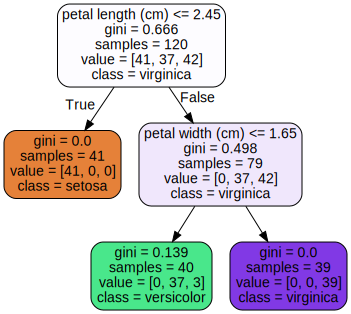

In [18]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join("iris_tree.dot"),
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join("iris_tree.dot"))

In [19]:
prediction = tree_clf.predict(X_test)

In [20]:
# evaluation for multi class classification
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, target_names=["type0","type1","type2"]))

              precision    recall  f1-score   support

       type0       1.00      1.00      1.00         9
       type1       0.92      0.85      0.88        13
       type2       0.78      0.88      0.82         8

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction))

0.9


In [54]:
tree_clf.predict_proba([[5, 1.5,1.5,5]])

array([[1., 0., 0.]])

In [56]:
tree_clf.predict([[5, 1.5,3.5,5]])

array([2])

In [26]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [28]:
rf_prediction = rnd_clf.predict(X_test)

In [29]:
# evaluation for multi class classification
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_prediction, target_names=["type0","type1","type2"]))

              precision    recall  f1-score   support

       type0       1.00      1.00      1.00         9
       type1       1.00      0.85      0.92        13
       type2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



In [30]:
rnd_clf.predict_proba([[5, 1.5,1.5,5]])

array([[0.47, 0.16, 0.37]])

In [31]:
rnd_clf.predict([[5, 1.5,1.5,5]])

array([0])

In [36]:
import xgboost as xgb
from xgboost import XGBClassifier

In [38]:
xgb_clf = xgb.XGBClassifier(n_estimators=15,learning_rate=0.5,max_delta_step=5)

In [39]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=5, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=15, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
xgb_prediction = xgb_clf.predict(X_test)

In [41]:
# evaluation for multi class classification
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_prediction, target_names=["type0","type1","type2"]))

              precision    recall  f1-score   support

       type0       1.00      1.00      1.00         9
       type1       1.00      0.85      0.92        13
       type2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



In [51]:
xgb_clf.predict(X_test[:3])

array([2, 1, 2])

In [52]:
xgb_clf.predict_proba(X_test[:3])

array([[0.00676532, 0.01131496, 0.9819197 ],
       [0.00527   , 0.98862666, 0.00610329],
       [0.00285348, 0.00354267, 0.9936039 ]], dtype=float32)